# INF4039 Deep Learning Systems / Giliojo mokymo sistemų taikymai
**LAB4**

## HOMEWORK TASK

Create a Multilayer Perceptron network for prediction from one of the following datasets:
1. Predict house prices: https://www.kaggle.com/datasets/shree1992/housedata
2. Predict student grades: https://www.kaggle.com/datasets/dipam7/student-grade-prediction
3. Predict flight prices: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
4. Any other dataset, which is suitable for prediction task.

Your Notebook/script must have the following parts:
1. Data exploration (visualizing data, describing what values will be used for training, what is the target of the classification, etc.);
2. Data preparation (fill empty values, remove outliers, check the correlations);
3. Split the data into train and test sets;
4. Neural network - try at least three different structures and see which one is the best for learning;
5. Model evaluation (accuracy, loss, ROC curve, etc.) - at leas two evaluation methods.

# Prediction with Multilayer Perceptron (MLP)

In this lab we will learn how to predict values using Keras deep learing library and the Boston housing dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

plt.style.use('seaborn')

## Load and explore Boston housing dataset

In [2]:
# For the dataset deprecation warning
import warnings
warnings.filterwarnings("ignore")


from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Uncomment if you want to read more about each variable in the dataframe

In [7]:
#print(boston.DESCR)

### Check for the NULL values

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


## Train/Test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [7]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [12]:
y_train

array([25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5, 43.5, 23.6, 11. ,
       33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3, 14.9, 26.6, 19.9,
       24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1, 25. ,  9.7, 23.9,
       36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5, 23.7, 28.5, 24.3,
       23.8, 19.1, 28.4, 20.5, 33.8, 14.5, 20.4, 16. , 13.3, 30.8, 27.5,
       24.4, 24.4, 25.1, 43.8, 21.9, 26.2, 14.2, 20.8, 20.1, 23.1, 13.1,
       16.2, 24.8, 20.2, 22.5, 14.8, 28.7, 20.1, 23.4, 32. , 19.1, 50. ,
       20.9, 21.7, 22. , 17.2, 30.3, 12.3, 21.4, 20.5, 35.2, 19.6, 22. ,
       21.7, 14.1, 21.1, 15. , 11.9, 20. , 41.3, 18.7, 50. , 50. , 18.4,
       17.9, 28.1, 16.1, 17.2, 28.6, 23.6, 20.4, 19.6, 18.8, 22.6, 17.7,
       30.5, 18.2, 20.6, 24.4, 17.3, 13.3, 22.8, 20.5, 21.2, 18.8, 18.9,
       18.2, 23.1, 32.7, 24. , 10.2, 19.5, 33.1, 13.4, 15.2, 24.8, 24.3,
        9.5, 24.2, 18.5, 44. , 50. , 24.7, 21.5,  8.4, 21.8, 50. , 23.8,
       32.4, 24.4, 17.6, 29.8,  9.6, 16.7, 13.8, 32

## Standardisation

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_x_train = scaler.fit_transform(X_train)
normalized_x_test = scaler.transform(X_test)

In [9]:
normalized_x_train

array([[-0.3892494 , -0.49559343, -0.60928978, ..., -0.24857777,
         0.28674182, -0.96685016],
       [-0.38783184,  0.57923879, -0.86952633, ...,  0.58214721,
         0.36669519, -0.82116789],
       [ 1.43554993, -0.49559343,  1.02669166, ...,  0.81290414,
         0.43472666,  2.50177533],
       ...,
       [ 0.23804008, -0.49559343,  1.02669166, ...,  0.81290414,
         0.43472666,  0.9145323 ],
       [-0.36856615, -0.49559343, -0.713092  , ..., -0.47933471,
         0.21433534, -0.26341291],
       [-0.39596611, -0.49559343, -0.74818007, ...,  0.35139027,
         0.43472666, -0.55616491]])

## Define the Neural Network

In [18]:
from keras.models import Sequential
from keras import layers

np.random.seed(1337)

def create_model():
    model = keras.Sequential( 
        [
            layers.Input(shape = normalized_x_train[0].shape),
            layers.Dense(64, activation="relu", name="layer1"),
            layers.Dense(64, activation="relu", name="layer2"),
            layers.Dense(1, activation = "linear", name="layer3"),
        ]
    )
    return model

model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                896       
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## Train the Neural Network

In [11]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [19]:
import datetime

model.compile(
    optimizer = "rmsprop", 
    loss = "mse", 
    metrics = ["mae"])

# Tensorboard logs dir
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size=5,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

#### Launch tensorboard

In [42]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Plot Training and Validations MAE and loss

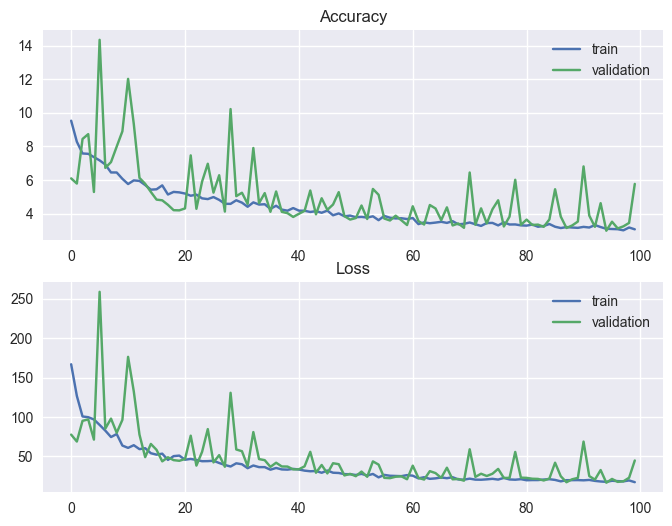

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

train_mae = history.history['mae']
val_mae = history.history['val_mae']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_mae, label='train')
ax1.plot(val_mae, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

## Evaluate model using Cross validation

In [14]:
from sklearn.model_selection import KFold
from tqdm import tqdm

X = scaler.fit_transform(df)
kf = KFold(n_splits=5)
history_dict = {}
scores = []

for index, (train_index, test_index) in tqdm(enumerate(kf.split(X))):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_model()
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(X_train, y_train, 
                    epochs = 30, 
                    batch_size=5,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])
    history_dict[index] = history

    scores.append(model.evaluate(X_test, y_test, verbose=0))

5it [00:07,  1.55s/it]


In [15]:
mean_loss = np.mean([score[0] for score in scores])
mean_mae = np.mean([score[1] for score in scores])

print(f"Loss evaluation = {mean_loss}")
print(f"MAE evaluation = {mean_mae}")

Loss evaluation = 22.204733467102052
MAE evaluation = 3.278751754760742


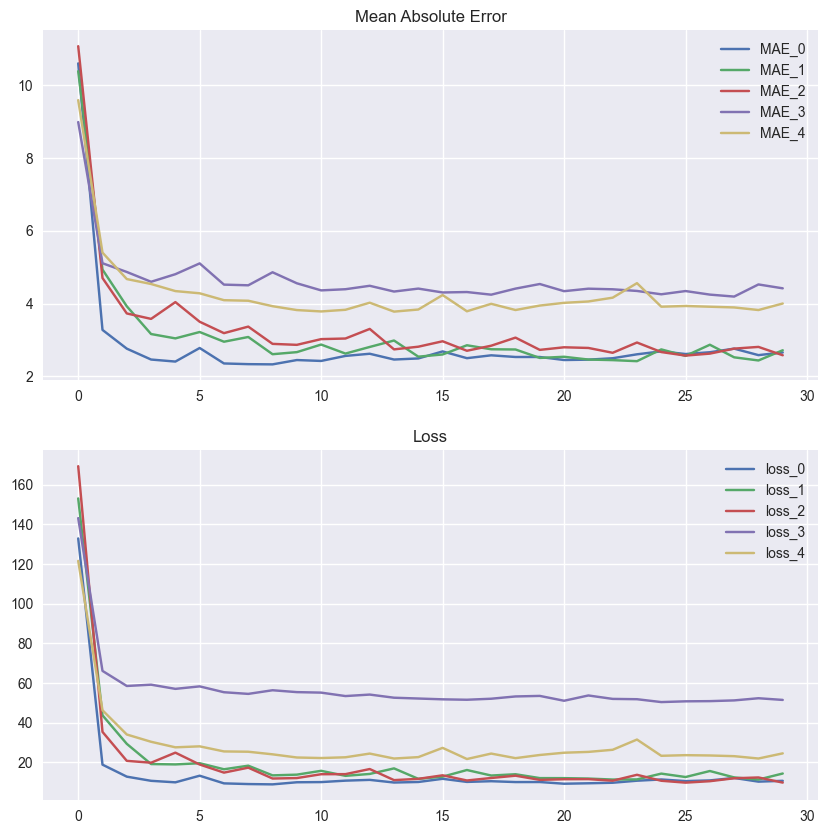

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for model in history_dict.keys():
    val_mae = history_dict.get(model).history['val_mae']
    val_loss = history_dict.get(model).history['val_loss']

    ax1.plot(val_mae, label=f'MAE_{model}')
    ax1.set_title("Mean Absolute Error")

    ax2.plot(val_loss, label=f'loss_{model}')
    ax2.set_title("Loss")

ax1.legend()
ax2.legend();